In [1]:
#Célula para importação de bibliotecas e APIs


#Conjunto de funções para trabalhar com arquivos
import os
import sys
sys.path.append("/home/tiagohbalves/Documentos/Audio_Files/Bruna/Afirmacao")


#Conjunto de funcoes para plot
import matplotlib.pyplot as plt



#Conjunto de funcoes para estrair o pitch
import f0_praat

#Conjunto de funções matemáticas
import numpy


#Conjunto de funcoes auxiliares caso necessário
import auxiliar_codes


#Sci-kit learn
import sklearn





In [1]:
#Célula para lê os diretórios e arquivos a serem utilizados



# The name of the audio file
files_perg = [];
files_afirm =[];

#The name of the directory of audio files
dire_afirm = "/home/tiagohbalves/Documentos/Audio_Files/Bruna/Afirmacao_1";
dire_perg = "/home/tiagohbalves/Documentos/Audio_Files/Bruna/Interrogacao_1";


for file in os.listdir(dire_afirm):
    if file.endswith(".wav"):
        files_afirm.append("/"+file);

files_afirm.sort();
files_perg=files_afirm;


tempo_afirm = numpy.loadtxt(open("/home/tiagohbalves/Documentos/Dados/tempos_afirmacao_1.csv","rb"),delimiter=",")
tempo_perg = numpy.loadtxt(open("/home/tiagohbalves/Documentos/Dados/tempos_pergunta_1.csv","rb"),delimiter=",")

tempo_afirm = (tempo_afirm*100);
tempo_afirm = tempo_afirm.astype(int);
tempo_perg = tempo_perg*100;
tempo_perg = tempo_perg.astype(int);

NameError: name 'os' is not defined

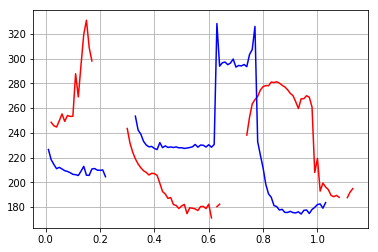

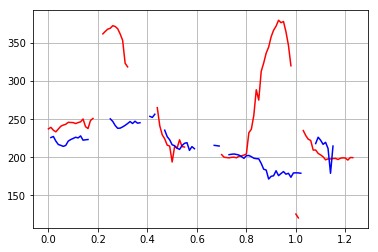

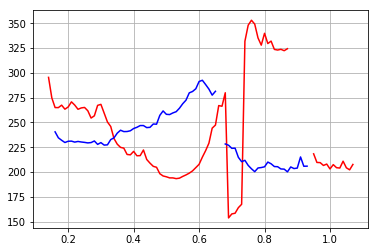

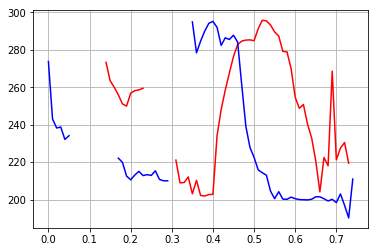

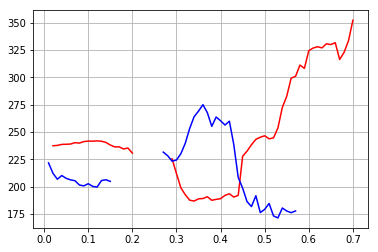

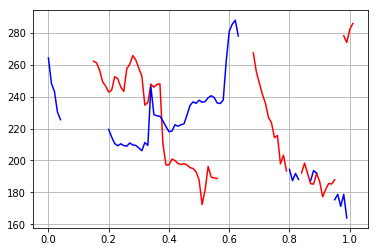

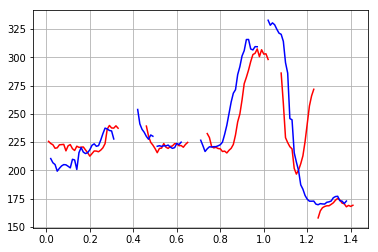

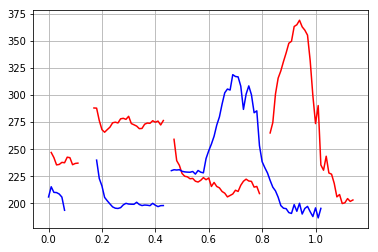

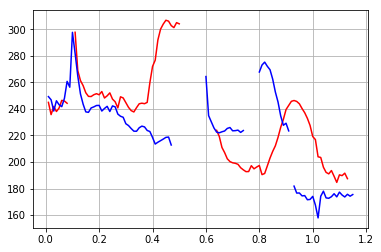

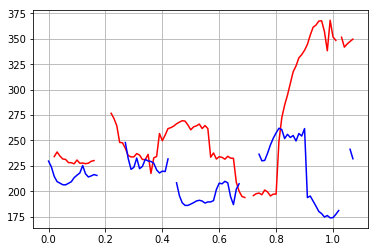

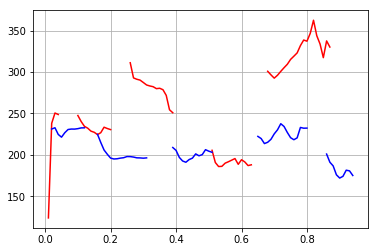

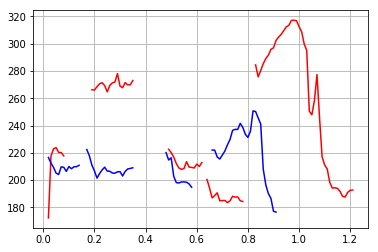

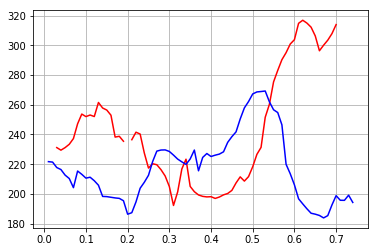

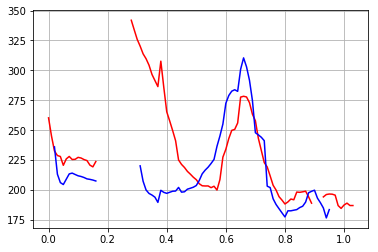

In [3]:
#The base rate
srate = 100.0;

# The pitch range to be used by the pitch extraction algorithm
#pitch_range = (150, 500);
#pitch_range = (40, 500);
pitch_range = (140, 400);

# Parameters for Praat's pitch extraction algorithm
input_parms = {};
input_parms["time_step"]     = 1.0/srate;
input_parms["pitch_floor"]   = pitch_range[0];
input_parms["pitch_ceiling"] = pitch_range[1];

#audio_file=dire_afirm+files_perg[0];


i = 0

t = numpy.arange(0.0,20.0,1/srate)

for i in range(0,14):
    audio_file_perg = dire_perg+files_perg[i];
    audio_file_afirm= dire_afirm+files_afirm[i];

    #  Extract the F0 signal
    (f0_signal_perg,f0_time_perg,f0_parms) = f0_praat.compute_f0_praat(audio_file_perg,input_parms);
    (f0_signal_afirm,f0_time_afirm,f0_parms) = f0_praat.compute_f0_praat(audio_file_afirm,input_parms);
    
    
    # Plot the F0 signal
    plt.plot(t[range(0,(tempo_perg[i,1] - tempo_perg[i,0]))], f0_signal_perg[range(tempo_perg[i,0],tempo_perg[i,1])],'r-',
             t[range(0,(tempo_afirm[i,1]) - tempo_afirm[i,0])],f0_signal_afirm[range(tempo_afirm[i,0],tempo_afirm[i,1])],'b-');
    plt.grid("on");
    plt.show();
    plt.savefig
    plt.ylabel('Frequência do sinal')
    plt.xlabel('Tempo da sentença')


# *ANÁLISE*

    Pode se observar uma subida no considerável no nível do pitch em todas sentenças, quando pergunta(em vermelho) em alhum momento comparado com a sentença afirmativa(em azul). Embora seja previsto que a alteração no pitch no final de cada sentença pode-se observar que no final o pitch tende a ser o mesmo. Isso se deve que embora o pitch aumenta, depois de cada sentença costuma se ter um ruido ou uma continuação normal do fonema anterior. A única diferença foi na última sentença("Você leu o livro? e "Você leu o livro."), onde a diferença de pitch ficou na palavra você. 
    